In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
df = pd.read_csv('/Users/guillermo/Downloads/Transplant___Recipient_Ethnicity_by_Organ.csv')
df

,Unnamed: 0,Unnamed: 1,All Ethnicities,White,Black,Hispanic,Unknown,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Organs,NaN,"846,715","527,189","161,473","108,120",215,"35,743","6,077","2,665","5,233"
1,Kidney,NaN,"498,372","271,416","121,559","70,767",28,"24,982","4,305","1,962","3,353"
2,Liver,NaN,"184,227","132,240","17,079","24,723",81,"7,476","1,162",359,"1,107"
3,Pancreas,NaN,"9,067","7,722",670,534,3,60,48,7,23
4,Kidney / Pancreas,NaN,"25,658","18,550","4,142","2,318",4,368,107,62,107
5,Heart,NaN,"80,487","57,134","13,800","6,454",38,"2,066",282,228,485
6,Lung,NaN,"44,212","36,852","3,584","2,779",6,682,146,34,129
7,Heart / Lung,NaN,"1,371","1,043",134,126,5,47,8,2,6
8,Intestine,NaN,"3,210","2,181",501,417,0,60,19,10,22
9,Abdominal Wall,NaN,20,0,1,0,18,0,0,1,0


In [400]:
df.drop(['Unnamed: 1', 'Unknown', 'American Indian/Alaska Native', 'Pacific Islander'], axis=1, inplace = True)
df.rename(columns={"Unnamed: 0": "Organ"}, inplace = True)
df['White'] = df['White'].str.replace(',','').astype(int)
df['Black'] = df['Black'].str.replace(',','').astype(int)
df['Hispanic'] = df['Hispanic'].str.replace(',','').astype(int)
df['Asian'] = df['Asian'].str.replace(',','').astype(int)
df['Multiracial'] = df['Multiracial'].str.replace(',','').astype(int)
df['All Ethnicities'] = df['All Ethnicities'].str.replace(',', '').astype(int)
df.dtypes



Organ              object
All Ethnicities     int64
White               int64
Black               int64
Hispanic            int64
Asian               int64
Multiracial         int64
dtype: object

In [401]:
df2 = df[0:7]
df2.drop(['Multiracial'], axis=1, inplace = True)
df2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Organ,All Ethnicities,White,Black,Hispanic,Asian
0,All Organs,846715,527189,161473,108120,35743
1,Kidney,498372,271416,121559,70767,24982
2,Liver,184227,132240,17079,24723,7476
3,Pancreas,9067,7722,670,534,60
4,Kidney / Pancreas,25658,18550,4142,2318,368
5,Heart,80487,57134,13800,6454,2066
6,Lung,44212,36852,3584,2779,682


In [402]:
dfallorgans = df2.loc[0].copy()
dfallorgans[columns] = dfallorgans[columns]/dfallorgans['All Ethnicities']
dfallorgans['White'] = dfallorgans['White']/dfallorgans['All Ethnicities']
dfallorgans['Black'] = dfallorgans['Black']/dfallorgans['All Ethnicities']
dfallorgans['Hispanic'] = dfallorgans['Hispanic']/dfallorgans['All Ethnicities']
dfallorgans['Asian'] = dfallorgans['Asian']/dfallorgans['All Ethnicities']
dfallorgans['White'] = dfallorgans['White']/0.7593333333333333
dfallorgans['Black'] = dfallorgans['Black']/0.12333333333333334
dfallorgans['Hispanic'] = dfallorgans['Hispanic']/0.126
dfallorgans['Asian'] = dfallorgans['Asian']/0.03866666666666667
display(dfallorgans)

Organ              All Organs
All Ethnicities           1.0
White                0.819967
Black                1.546259
Hispanic              1.01344
Asian                1.091734
Name: 0, dtype: object

# Bar graph of transplants received proportioned to ethnicity population

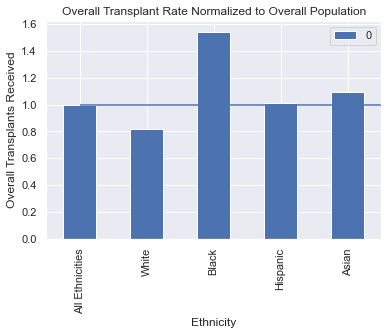

In [403]:
sns.set_theme(style="darkgrid")
ax = dfallorgans[columns].T.plot(kind = 'bar');
plt.hlines(1, xmin = 0, xmax = 5)
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Overall Transplants Received", title = 'Overall Transplant Rate Normalized to Overall Population');


In [404]:
'''
Equation normalizing the amount of donations by each ethnicity to the overall donation amount
'''
df_max_scaled = df2.copy()
columns = ['All Ethnicities', 'White', 'Black', 'Hispanic', 'Asian']
df_max_scaled[columns] = df_max_scaled[columns].div(df_max_scaled['All Ethnicities'], axis = 0)
display(df_max_scaled)



,Organ,All Ethnicities,White,Black,Hispanic,Asian
0,All Organs,1.0,0.622629,0.190705,0.127693,0.042214
1,Kidney,1.0,0.544605,0.243912,0.141996,0.050127
2,Liver,1.0,0.717810,0.092706,0.134199,0.040580
3,Pancreas,1.0,0.851660,0.073894,0.058895,0.006617
4,Kidney / Pancreas,1.0,0.722971,0.161431,0.090342,0.014343
5,Heart,1.0,0.709854,0.171456,0.080187,0.025669
6,Lung,1.0,0.833529,0.081064,0.062856,0.015426


# Bar graph of Hispanic transplants in proportion to overall Hispanic population

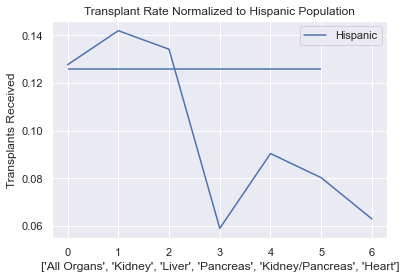

In [405]:
sns.set_theme(style="darkgrid")
ax = df_max_scaled['Hispanic'].T.plot(kind = 'line');
plt.hlines(.126, xmin = 0, xmax = 5)
plt.legend(loc='upper right')
ax.set(xlabel = ['All Organs', 'Kidney', 'Liver', 'Pancreas', 'Kidney/Pancreas', 'Heart'], ylabel = "Transplants Received", title = 'Transplant Rate Normalized to Hispanic Population');

# Bar graph of Black transplants in proportion to overall Black population

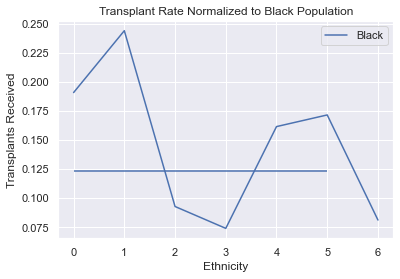

In [406]:
ax = df_max_scaled['Black'].T.plot(kind = 'line');
plt.hlines(0.12333333333333334, xmin = 0, xmax = 5)
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Transplants Received", title = 'Transplant Rate Normalized to Black Population');



# Bar graph of White transplants in proportion to overall White population

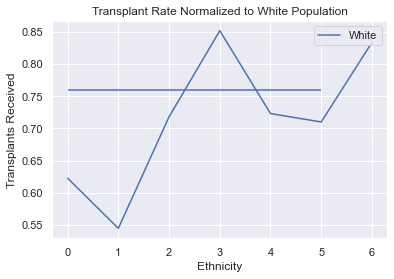

In [407]:
ax = df_max_scaled['White'].T.plot(kind = 'line');
plt.hlines(0.7593333333333333, xmin = 0, xmax = 5)
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Transplants Received", title = 'Transplant Rate Normalized to White Population');



# Bar graph of Asian transplants in proportion to overall Asian population

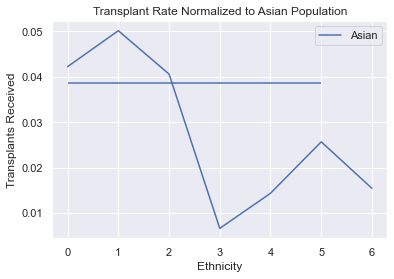

In [408]:
ax = df_max_scaled['Asian'].T.plot(kind = 'line');
plt.hlines(0.03866666666666667, xmin = 0, xmax = 5)
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Transplants Received", title = 'Transplant Rate Normalized to Asian Population');



In [443]:
dfpop = df2.loc[0].copy()
dfpop
'''
Now, taking the amount of donations from the 'waiting list' data set, and then dividing the number of 'All Organs' transplanted
to see the supply and demand 
'''

#dfpop.drop([1,2,3,4,5,6]);
dfpop.replace({846715: 413435/846715, 527189: 290985/527189, 161473: 53737/161473, 108120: 51674/108120, 35743: 10588/35743}, inplace = True);
dfpop.replace({})
# Dividing all columns by 'All Ethnicities' to proportion against the overall supply and demand
dfpop['All Ethnicities'] = dfpop['All Ethnicities']/dfpop['All Ethnicities']
dfpop['White'] = dfpop['White']/dfpop['All Ethnicities']
dfpop['Black'] = dfpop['Black']/dfpop['All Ethnicities']
dfpop['Hispanic'] = dfpop['Hispanic']/dfpop['All Ethnicities']
dfpop['Asian'] = dfpop['Asian']/dfpop['All Ethnicities']
dfpop

Organ              All Organs
All Ethnicities           1.0
White                0.551956
Black                0.332792
Hispanic             0.477932
Asian                0.296226
Name: 0, dtype: object

# Bar Graph representing the overall transplant rate in proportion to the waiting list by ethnicity

In [444]:
sns.set_theme(style="darkgrid")
ax = dfpop.T.plot(kind = 'bar');
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Transplants Recieved", title = 'Transplant Rate Proportioned to Overall Donations by Ethnicity');

TypeError: no numeric data to plot

In [431]:
'''
Normalizing the data to the each respective Ethnicity's population by taking the proportions of 
overall donations/waitinglist and dividing that by ethnicity population. The closer to 1, the more representation.

'''
dfpop2 = dfpop.copy()
dfpop2
dfpop2['White'] = dfpop2['White']/0.7593333333333333
dfpop2['Black'] = dfpop2['Black']/0.12333333333333334
dfpop2['Hispanic'] = dfpop2['Hispanic']/0.126
dfpop2['Asian'] = dfpop2['Asian']/0.03866666666666667
dfpop2

,Organ,All Ethnicities,White,Black,Hispanic,Asian
0,All Organs,1.0,0.726895,2.698317,3.793111,7.661013
1,Kidney,1.0,357439.859526,985613.513514,561642.857143,646086.206897
2,Liver,1.0,174152.765584,138478.378378,196214.285714,193344.827586
3,Pancreas,1.0,10169.446883,5432.432432,4238.095238,1551.724138
4,Kidney / Pancreas,1.0,24429.323968,33583.783784,18396.825397,9517.241379
5,Heart,1.0,75242.317823,111891.891892,51222.222222,53431.034483
6,Lung,1.0,48532.045654,29059.459459,22055.555556,17637.931034


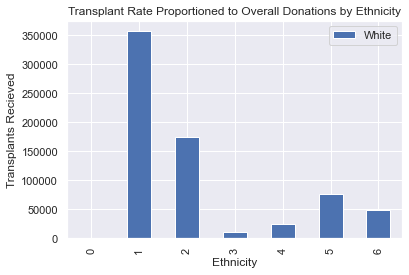

In [435]:
sns.set_theme(style="darkgrid")
ax = dfpop2['White'].T.plot(kind = 'bar');
plt.legend(loc='upper right')
ax.set(xlabel="Ethnicity", ylabel = "Transplants Recieved", title = 'Transplant Rate Proportioned to Overall Donations by Ethnicity');

In [413]:
'''
Normalizing the row data by the 'All Ethnicities' column to proportionize all of the data
'''
df3 = pd.DataFrame(df[0:9])
df3['White'] = (df['White'] / df['All Ethnicities']) 
df3['Black'] = (df['Black'] / df['All Ethnicities']) 
df3['Hispanic'] = (df['Hispanic'] / df['All Ethnicities']) 
df3['Asian'] = (df['Asian'] / df['All Ethnicities'])
df3['Multiracial'] = (df['Multiracial'] / df['All Ethnicities']) 
df3

,Organ,All Ethnicities,White,Black,Hispanic,Asian,Multiracial
0,All Organs,846715,0.622629,0.190705,0.127693,0.042214,0.006180
1,Kidney,498372,0.544605,0.243912,0.141996,0.050127,0.006728
2,Liver,184227,0.717810,0.092706,0.134199,0.040580,0.006009
3,Pancreas,9067,0.851660,0.073894,0.058895,0.006617,0.002537
4,Kidney / Pancreas,25658,0.722971,0.161431,0.090342,0.014343,0.004170
5,Heart,80487,0.709854,0.171456,0.080187,0.025669,0.006026
6,Lung,44212,0.833529,0.081064,0.062856,0.015426,0.002918
7,Heart / Lung,1371,0.760759,0.097739,0.091904,0.034282,0.004376
8,Intestine,3210,0.679439,0.156075,0.129907,0.018692,0.006854


In [414]:
'''
Normalizing the pie chart by ethnicity population
'''
df3.drop(['Organ', 'All Ethnicities', 'Multiracial'], axis = 1, inplace = True)
df4 = df3.loc[0,:]
perc_values = df3.loc[0,:].values
perc_values
df4['White'] = df4['White']/0.7593333333333333
df4['Black'] = df4['Black']/0.12333333333333334
df4['Hispanic'] = df4['Hispanic']/0.126
df4['Asian'] = dfallorgans['Asian']/0.03866666666666667


# Pie chart of all ethnicities that have received transplants

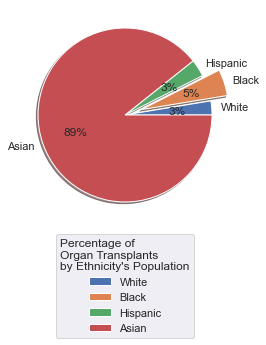

In [415]:
fig1, ax1 = plt.subplots()
my_labels = ['White', 'Black', 'Hispanic', 'Asian']
my_explode = (0, 0.2, 0, 0)
plt.pie(perc_values, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = "Percentage of \nOrgan Transplants \nby Ethnicity's Population")
plt.show()

In [416]:
df3['White'] = df3['White']/0.7593333333333333
df3['Black'] = df3['Black']/0.12333333333333334
df3['Hispanic'] = df3['Hispanic']/0.126
df3['Asian'] = df3['Asian']/0.03866666666666667
kid_perc_values = df3.loc[1,:].values
kid_perc_values



array([0.71721497, 1.97766631, 1.12695508, 1.29639347])

# Pie chart showing percentage of kidney transplants by ethnicity.

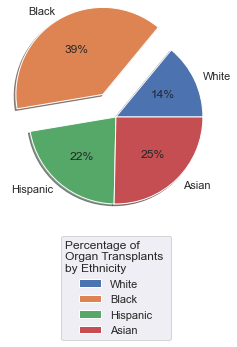

In [417]:
fig1, ax1 = plt.subplots()
my_labels = ['White', 'Black', 'Hispanic', 'Asian']
my_explode = (0., 0.3, 0, 0)
plt.pie(kid_perc_values, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = 'Percentage of \nOrgan Transplants \nby Ethnicity')
plt.show()

# To Do:

### On the first graph, use standard deviation across the average population to give a more accurate comparison.
### Change colors of pie chart to better represent the graph.